<h1>Network of Reddit Users with Negative Sentiments (Corona Lockdown)</h1>

Objective: 
- To find out which author on Reddit is the most negative based its interaction with other authors (determined by the edge weight/frequency) in the coronavirus anti lockdown subreddit and possibly showcase some comments which have been posted by that author of interest

Findings:
- Most negative author: WickedSensitiveCrew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
reddit_sentiments = pd.read_csv('../Reddit_Sentiments/corona_sentiments.csv')

In [3]:
reddit_sentiments

,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary
0,0,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,NaN,delet,1,0.0000,0,negative
1,1,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,NaN,remov,0,0.0000,0,negative
2,2,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,lyrkyr12345,joe arpaio human garbag,0,0.0000,0,negative
3,3,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,Latexfrog,paul penzon i great fortun go sheriff offic today,0,0.6249,2,positive
4,4,0,hb3v90,hunter15991,Arizona Sheriff Who Refused to Enforce Lockdow...,63153,1166,1.592440e+09,2020-06-18 08:29:20,Basslineblues,unfortun joe arpaio run sheriff,0,0.0000,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,9759,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,plentyoffishes,won work like first one work,1,0.7351,2,positive
9760,9760,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,BadTiger85,i would expect kind unrest franc seen itali right,1,0.5267,2,positive
9761,9761,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,GEM592,riot 3 2,1,-0.5574,1,neutral
9762,9762,0,jjlxfb,Aryamatha,France expected to impose four-week national l...,4913,802,1.603884e+09,2020-10-28 19:23:22,VagnerLove,where bloodi prep meant whilst lock first time...,1,-0.3818,1,neutral


In [4]:
# Create new DataFrame for forming a network graph

user_networks = reddit_sentiments.filter(['author','commenter','comment'], axis=1)
user_networks['type'] = ['Undirected'] * user_networks.shape[0]
user_networks['weight'] = [1] * user_networks.shape[0]
user_networks

,author,commenter,comment,type,weight
0,hunter15991,NaN,delet,Undirected,1
1,hunter15991,NaN,remov,Undirected,1
2,hunter15991,lyrkyr12345,joe arpaio human garbag,Undirected,1
3,hunter15991,Latexfrog,paul penzon i great fortun go sheriff offic today,Undirected,1
4,hunter15991,Basslineblues,unfortun joe arpaio run sheriff,Undirected,1
...,...,...,...,...,...
9759,Aryamatha,plentyoffishes,won work like first one work,Undirected,1
9760,Aryamatha,BadTiger85,i would expect kind unrest franc seen itali right,Undirected,1
9761,Aryamatha,GEM592,riot 3 2,Undirected,1
9762,Aryamatha,VagnerLove,where bloodi prep meant whilst lock first time...,Undirected,1


In [5]:
# Check for correctness

author = user_networks[user_networks['author'] == 'signed7']
author

,author,commenter,comment,type,weight


In [6]:
# Preview edge weight

edges = user_networks.groupby(['author','commenter']).agg({'weight':'sum'}).reset_index()
edges

,author,commenter,weight
0,Aryamatha,-Anti_X,1
1,Aryamatha,0fiuco,1
2,Aryamatha,2314dsp,1
3,Aryamatha,2443222,1
4,Aryamatha,2f33t,1
...,...,...,...
7074,thebelsnickle1991,wmorris33026,1
7075,thebelsnickle1991,wtfman1988,1
7076,thebelsnickle1991,xeow,1
7077,thebelsnickle1991,zns26,1


In [7]:
# Sort DataFrame based on descending edge weight

edges.sort_values('weight', ascending=False).head()

,author,commenter,weight
3977,WickedSensitiveCrew,xandro75,23
1562,Noisy_Toy,AutoModerator,19
6678,mythrowawaybabies,hangry-like-the-wolf,17
5508,mvea,AutoModerator,16
4978,hunter15991,AutoModerator,16


In [8]:
# Create a network graph

network = nx.from_pandas_edgelist(edges, 
                            source='author',
                            target='commenter',
                            edge_attr='weight' )

In [9]:
# Get network graph nodes (author) and edges (interaction) info

print(nx.info(network))

Graph with 6593 nodes and 7079 edges


<ipython-input-9-06ea12accad0>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(network))


In [10]:
# Get network graph degree per node

weighted_degrees = dict(nx.degree(network, weight='weight'))
# weighted_degrees
# print(sum(weighted_degrees.values()))
# print(len(weighted_degrees.values()))
avg_degree = sum(weighted_degrees.values()) / len(weighted_degrees.values())
avg_degree

2.431669952980434

In [11]:
subGraph = network.subgraph([n for n in weighted_degrees if weighted_degrees[n] > 2.35])

In [12]:
# Focus on sub network with a considerable high degree centrality

print(nx.info(subGraph))

Graph with 270 nodes and 511 edges


<ipython-input-12-f52f3a138b15>:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(subGraph))


In [13]:
# Create subgraph's network 

pos = nx.spring_layout(subGraph, weight='weight', iterations=20, k=4)

<ipython-input-14-4867607799ff>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


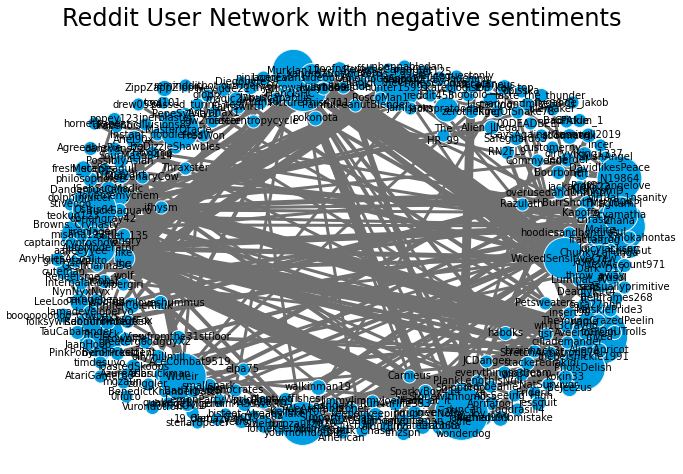

In [14]:
# Plot subgraph's network

fig, ax = plt.subplots()
figsize = fig.get_size_inches()
plt.axis('off')
plt.title('Reddit User Network with negative sentiments', fontsize = 24)


for node in subGraph.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subGraph, pos, nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subGraph, pos, {n:n.replace('-','\n') for n in subGraph.nodes() if weighted_degrees[n]>avg_degree},font_size=10);

for e in subGraph.edges(data=True):
    if e[2]['weight']>avg_degree:
        nx.draw_networkx_edges(subGraph, pos,[e], width=e[2]['weight'], edge_color='#707070')
        
fig.set_size_inches(figsize * 2)
fig.show()
plt.savefig('../Reddit_Output/Reddit_SNA_Corona_Lockdown.png')

In [15]:
# Most negative user and its comments

author = reddit_sentiments[(reddit_sentiments['author'] == 'WickedSensitiveCrew') & (reddit_sentiments['sentiment_polarity'] == 'negative')]
author

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Unnamed: 0.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary


In [16]:
# Node-level Statistics
# Normalize - Better for comparison between different networks

print("Number of nodes in subGraph: ", subGraph.number_of_nodes())
print("==========================================")
print("Number of edges in subGraph: ", subGraph.number_of_edges())
print("==========================================")
print("Nodes' Degree Centrality (Non-Normalized) in subGraph: ", nx.degree(subGraph))
print("==========================================")
print("Nodes' Degree Centrality (Normalized) in subGraph: ", nx.degree_centrality(subGraph))

Number of nodes in subGraph:  270
Number of edges in subGraph:  511
Nodes' Degree Centrality (Non-Normalized) in subGraph:  [('outrider567', 5), ('fenceguestonly', 1), ('drew0594', 1), ('folksywisdomfromback', 1), ('DangerousCalm', 1), ('Spark_Chaser', 1), ('decaloneus', 1), ('remindditbot', 1), ('asbruckman', 1), ('Diegobyte', 3), ('thebelsnickle1991', 12), ('RN2FL9', 1), ('boooooooooo_cowboys', 2), ('FieldOfFox', 2), ('AceCombat9519', 4), ('craigybacha', 3), ('chrasb', 3), ('BurrShotFirst1804', 2), ('PepeSylvia11', 2), ('illenial999', 1), ('HauntingVerus', 2), ('hoodiesandbonfires', 3), ('lenerdel', 1), ('SideHug', 1), ('___o----', 1), ('bisteot', 3), ('Bourbone', 1), ('zerotheliger', 2), ('bronet', 1), ('Shipporno', 1), ('Browns_Crynasty', 1), ('AtariGamer83', 1), ('Crabbita', 1), ('unbannabledan', 3), ('NynNyxNyx', 1), ('robbi3', 1), ('iperblaster', 2), ('_AlreadyTaken_', 2), ('lovememychem', 2), ('FredWon', 1), ('habdks', 1), ('reddit455', 1), ('Commyende', 2), ('Ingoiolo', 2), ('

In [17]:
# Node-level Statistics

print("Nodes' Closeness Centrality in subGraph: ", nx.closeness_centrality(subGraph))
print("==========================================")
print("Nodes' Eigenvector Centrality in subGraph: ", nx.eigenvector_centrality(subGraph))
print("==========================================")
print("Nodes' Betweenness Centrality (Normalized) in subGraph: ", nx.betweenness_centrality(subGraph, normalized=True))

Nodes' Closeness Centrality in subGraph:  {'outrider567': 0.35771276595744683, 'fenceguestonly': 0.25521821631878555, 'drew0594': 0.2673956262425447, 'folksywisdomfromback': 0.269, 'DangerousCalm': 0.2784679089026915, 'Spark_Chaser': 0.2784679089026915, 'decaloneus': 0.269, 'remindditbot': 0.269, 'asbruckman': 0.2739307535641548, 'Diegobyte': 0.3149882903981265, 'thebelsnickle1991': 0.34575835475578404, 'RN2FL9': 0.25717017208413, 'boooooooooo_cowboys': 0.2956043956043956, 'FieldOfFox': 0.29366812227074235, 'AceCombat9519': 0.35071707953063885, 'craigybacha': 0.3015695067264574, 'chrasb': 0.29431072210065645, 'BurrShotFirst1804': 0.28256302521008403, 'PepeSylvia11': 0.28256302521008403, 'illenial999': 0.2849576271186441, 'HauntingVerus': 0.2867803837953092, 'hoodiesandbonfires': 0.3146198830409357, 'lenerdel': 0.26372549019607844, 'SideHug': 0.2849576271186441, '___o----': 0.26320939334637966, 'bisteot': 0.3084862385321101, 'Bourbone': 0.269, 'zerotheliger': 0.2911255411255411, 'bronet

Nodes' Betweenness Centrality (Normalized) in subGraph:  {'outrider567': 0.026495499751507834, 'fenceguestonly': 0.0, 'drew0594': 0.0, 'folksywisdomfromback': 0.0, 'DangerousCalm': 0.0, 'Spark_Chaser': 0.0, 'decaloneus': 0.0, 'remindditbot': 0.0, 'asbruckman': 0.0, 'Diegobyte': 0.007579696084644012, 'thebelsnickle1991': 0.04894155625782659, 'RN2FL9': 0.0, 'boooooooooo_cowboys': 0.001494019388980317, 'FieldOfFox': 0.001392072599196847, 'AceCombat9519': 0.01595895869069882, 'craigybacha': 0.0033559808541252087, 'chrasb': 0.004218191415711508, 'BurrShotFirst1804': 0.0005525460552072441, 'PepeSylvia11': 0.0012804725818610031, 'illenial999': 0.0, 'HauntingVerus': 0.0014815796244076807, 'hoodiesandbonfires': 0.006067706982176353, 'lenerdel': 0.0, 'SideHug': 0.0, '___o----': 0.0, 'bisteot': 0.0035933394142729645, 'Bourbone': 0.0, 'zerotheliger': 0.003342433414844928, 'bronet': 0.0, 'Shipporno': 0.0, 'Browns_Crynasty': 0.0, 'AtariGamer83': 0.0, 'Crabbita': 0.0, 'unbannabledan': 0.0035772948219

In [18]:
# Network-level Statistics

print("Network Density in subGraph: ", nx.density(subGraph))
print("==========================================")
print("Network Diameter in subGraph: ", nx.diameter(subGraph))
print("==========================================")
print("Network Average path length in subGraph: ", nx.average_shortest_path_length(subGraph))

Network Density in subGraph:  0.014071320391022994
Network Diameter in subGraph:  6
Network Average path length in subGraph:  3.460140437835605


In [19]:
# Network-level Statistics

num_max_reachable_other_nodes = subGraph.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(subGraph.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(subGraph, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  269
Current node is outrider567  and node-level reachability is 1.0
{'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'asbruckman', 'remindditbot', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Crabbita', 'Browns_Crynasty', 'AtariGamer83', 'Shipporno', 'NynNyxNyx', 'unbannabledan', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'habdks', 'FredWon', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'SlushAngel', 'cuteman', 'TheJeck', 'JaapHoop', 'skateologist', 'Stonewit

Current node is FredWon  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'SlushAngel', 'cuteman', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'plentyoffishes', 'virtual_1nsanit

Current node is BenedictKhanberbatch  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'SlushAngel', 'cuteman', 'TheJeck', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'virtual_1nsanity', 'plentyoffishe

Current node is gw2master  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'illenial999', 'PepeSylvia11', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'plentyoffishes', 'Pi

Current node is afops  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'SlushAngel', 'TheJeck', 'cuteman', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'NONcomD', 'virtual_1nsan

Current node is tool101  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'FieldOfFox', 'boooooooooo_cowboys', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'illenial999', 'PepeSylvia11', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'Crabbita', 'Shipporno', 'bronet', 'AtariGamer83', 'Browns_Crynasty', 'NynNyxNyx', 'unbannabledan', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'habdks', 'FredWon', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'virtual_1nsanity', 'Pi

Current node is BadTiger85  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'asbruckman', 'remindditbot', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'Crabbita', 'AtariGamer83', 'unbannabledan', 'NynNyxNyx', 'robbi3', 'iperblaster', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'plentyoffishes', 'P

Current node is LuminaL_IV  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'lenerdel', 'hoodiesandbonfires', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'SlushAngel', 'cuteman', 'TheJeck', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'virtual_1nsanity', 

Current node is jirenlagen  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'illenial999', 'PepeSylvia11', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'FredWon', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'virtual_1nsanity', 

Current node is MasterOracle  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'remindditbot', 'asbruckman', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'illenial999', 'PepeSylvia11', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'bronet', 'Shipporno', 'Browns_Crynasty', 'AtariGamer83', 'Crabbita', 'unbannabledan', 'NynNyxNyx', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'FredWon', 'lovememychem', 'habdks', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'plentyoffishes', 

Current node is Noisy_Toy  and node-level reachability is 1.0
{'outrider567', 'fenceguestonly', 'drew0594', 'folksywisdomfromback', 'DangerousCalm', 'Spark_Chaser', 'decaloneus', 'asbruckman', 'remindditbot', 'Diegobyte', 'thebelsnickle1991', 'RN2FL9', 'boooooooooo_cowboys', 'FieldOfFox', 'AceCombat9519', 'craigybacha', 'chrasb', 'BurrShotFirst1804', 'PepeSylvia11', 'illenial999', 'HauntingVerus', 'hoodiesandbonfires', 'lenerdel', 'SideHug', '___o----', 'bisteot', 'Bourbone', 'zerotheliger', 'Crabbita', 'bronet', 'Browns_Crynasty', 'AtariGamer83', 'Shipporno', 'NynNyxNyx', 'unbannabledan', 'iperblaster', 'robbi3', '_AlreadyTaken_', 'lovememychem', 'habdks', 'FredWon', 'reddit455', 'Commyende', 'Ingoiolo', 'MetalSeagull', 'tmzspn', 'wip30ut', 'dracenois', 'adminPASSW0RD', 'CPAlum_1', 'BenedictKhanberbatch', 'popey123', 'everythingsadream', 'GaysAgainstGaming', 'PinkPonyForPresident', 'TheJeck', 'cuteman', 'SlushAngel', 'JaapHoop', 'skateologist', 'Stonewithnomoss', 'virtual_1nsanity', '